In [ ]:
!pip install langchain openai langgraph langsmith
!pip install python-dotenv
!pip install langchain.llms
!pip install langchain.prompts
!pip install langchain.chains
!pip install langchain.memory
!pip install langgraph
!pip install langchain_community
!pip install langchain_experimental
!pip install --upgrade langchain
!pip install --upgrade langsmith
!pip install ollama_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.4/362.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Succ

In [ ]:
#Using Ollama
!pip install ollama
from ollama import Client
llm = Client(host=<ng_rok_url>)
#client = Client(host=,local_host>)
response = llm.chat(model='llama3.1', messages=[
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
])
#ollama_url = "https://1675-155-246-151-38.ngrok-free.app"
#client = OllamaClient(ollama_url)

In [ ]:
response['message']

{'role': 'assistant',
 'content': "The sky appears blue to us because of a phenomenon called Rayleigh scattering. Here's a simplified explanation:\n\n1. **Sunlight**: The sun emits white light, which contains all the colors of the visible spectrum (red, orange, yellow, green, blue, indigo, and violet).\n2. **Atmosphere**: When this sunlight enters our atmosphere, it encounters tiny molecules of gases like nitrogen (N2) and oxygen (O2). These molecules are much smaller than the wavelength of light.\n3. **Scattering**: As the sunlight travels through the atmosphere, these gas molecules scatter the light in all directions. This scattering effect is more pronounced for shorter wavelengths (like blue and violet) than for longer wavelengths (like red and orange).\n4. **Blue dominance**: Since the blue light is scattered more efficiently than other colors, it reaches our eyes from all directions, making the sky appear blue.\n\nIn essence, the blue color of the sky is a result of the way we pe

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [ ]:
#Libraries

from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory
from langgraph.graph import Graph
import os
from langchain.smith import RunEvalConfig, run_on_dataset
from langsmith import Client
from langchain.callbacks.tracers import LangChainTracer



In [ ]:
#Enviroment

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "<langsmith_key>"
os.environ["OPENAI_API_KEY"] = "<openai_key"

In [ ]:
summary_config = [ { "Current Summary": "First Message", "Prompt": "Hello, I'm PsyOzen AI. How can I help you today?", "Text": "Hi, I'm Tom. My wife Emma and I are seriously considering divorce after 15 years of marriage. We're both at our wit's end.", "New Summary": "Tom and his wife Emma are contemplating divorce after 15 years of marriage. The situation appears dire." }, { "Current Summary": "Tom and his wife Emma are contemplating divorce after 15 years of marriage. The situation appears dire.", "Prompt": "I understand you're going through a difficult time, Tom. We will focus on how our thoughts affect our feelings and behaviors. Can you identify a specific situation recently that led to conflict between you and Emma?", "Text": "Last night, Emma asked me about my day at work. I gave a short answer because I was tired. She then said, 'You never want to talk to me anymore.' I felt attacked and just walked away. We ended up not speaking for the rest of the evening.", "New Summary": "Tom describes a recent conflict where his short response to Emma's question about his day led to her expressing frustration about his communication. Tom felt attacked and withdrew, resulting in an evening of silence. This situation demonstrates negative thought patterns and behaviors that CBT can address." }, { "Current Summary": "Tom describes a recent conflict where his short response to Emma's question about his day led to her expressing frustration about his communication. Tom felt attacked and withdrew, resulting in an evening of silence. This situation demonstrates negative thought patterns and behaviors that CBT can address.", "Prompt": "Thank you for sharing that, Tom. Let's break this down. What thoughts went through your mind when Emma said, 'You never want to talk to me anymore'?", "Text": "I thought, 'She's always criticizing me. Nothing I do is ever good enough for her. She doesn't understand how hard I work.' It made me feel angry and unappreciated.", "New Summary": "Tom's automatic thoughts in response to Emma's comment include beliefs about constant criticism, inadequacy, and lack of understanding. These thoughts led to feelings of anger and being unappreciated, resulting in withdrawal behavior. This cognitive pattern is a key focus for CBT intervention." }, { "Current Summary": "Tom's automatic thoughts in response to Emma's comment include beliefs about constant criticism, inadequacy, and lack of understanding. These thoughts led to feelings of anger and being unappreciated, resulting in withdrawal behavior. This cognitive pattern is a key focus for CBT intervention.", "Prompt": "I see. Now, let's examine these thoughts. Are they factually true? Are there any exceptions to 'She's always criticizing me' or 'Nothing I do is ever good enough'?", "Text": "Well, when you put it that way... I guess she does compliment me sometimes, especially about how I am with the kids. And she was supportive when I got that promotion last year. Maybe 'always' and 'nothing' are too strong.", "New Summary": "Through CBT questioning, Tom recognizes that his automatic thoughts contain cognitive distortions, specifically overgeneralization. He acknowledges exceptions to his beliefs about constant criticism and inadequacy. This realization opens the door for cognitive restructuring and behavior modification." } ]


response_config = [ { 'Current Summary': "Tom and his wife Emma are contemplating divorce after 15 years of marriage. The situation appears critical and requires CBT intervention.", 'Text': "Hi, I'm Tom. My wife Emma and I are seriously considering divorce after 15 years of marriage. We're both at our wit's end.", 'Response': "I understand you're going through a difficult time, Tom. We will focus on how our thoughts affect our feelings and behaviors. This approach can be very helpful in addressing relationship issues. To start, it would be helpful to examine a specific situation that led to conflict between you and Emma." }, { 'Current Summary': "Tom describes a recent conflict where his short response to Emma's question about his day led to her expressing frustration about his communication. Tom felt attacked and withdrew, resulting in an evening of silence. This situation demonstrates negative thought patterns and behaviors that CBT can address.", 'Text': "Last night, Emma asked me about my day at work. I gave a short answer because I was tired. She then said, 'You never want to talk to me anymore.' I felt attacked and just walked away. We ended up not speaking for the rest of the evening.", 'Response': "Thank you for sharing that specific example. Let's break this down into thoughts, feelings, and behaviors. You've described your behavior (giving a short answer and walking away) and Emma's response. Now, let's focus on your thoughts. What went through your mind when Emma said, 'You never want to talk to me anymore'?" }, { 'Current Summary': "Tom's automatic thoughts in response to Emma's comment include beliefs about constant criticism, inadequacy, and lack of understanding. These thoughts led to feelings of anger and being unappreciated, resulting in withdrawal behavior. This cognitive pattern is a key focus for CBT intervention.", 'Text': "I thought, 'She's always criticizing me. Nothing I do is ever good enough for her. She doesn't understand how hard I work.' It made me feel angry and unappreciated.", 'Response': "Thank you for identifying those thoughts, Tom. We call these 'automatic thoughts' - they pop into our minds quickly and can strongly influence our emotions and actions. Now, let's examine these thoughts more closely. One technique we usually use to question the validity of our automatic thoughts. Are these thoughts factually true? Are there any exceptions to 'She's always criticizing me' or 'Nothing I do is ever good enough'?" }, { 'Current Summary': "Through CBT questioning, Tom recognizes that his automatic thoughts contain cognitive distortions, specifically overgeneralization. He acknowledges exceptions to his beliefs about constant criticism and inadequacy. This realization opens the door for cognitive restructuring and behavior modification.", 'Text': "Well, when you put it that way... I guess she does compliment me sometimes, especially about how I am with the kids. And she was supportive when I got that promotion last year. Maybe 'always' and 'nothing' are too strong.", 'Response': "Excellent observation, Tom. You've just engaged in what we call 'cognitive restructuring' - challenging and modifying unhelpful thought patterns. You've identified that words like 'always' and 'nothing' are overgeneralizations. This is a common cognitive distortion. By recognizing these exceptions, you're starting to see a more balanced view of your relationship with Emma. Now, let's think about how this realization might change your feelings and behaviors in similar situations in the future." } ]



question_config = [ { 'Text': "Hi, I'm Tom. My wife Emma and I are seriously considering divorce after 15 years of marriage. We're both at our wit's end.", 'Response': "I understand you're going through a difficult time, Tom. In situations like these, we focus on how our thoughts affect our feelings and behaviors. This approach can be very helpful in addressing relationship issues.", 'Question': "To start, can you identify a specific situation recently that led to conflict between you and Emma?" }, { 'Text': "Last night, Emma asked me about my day at work. I gave a short answer because I was tired. She then said, 'You never want to talk to me anymore.' I felt attacked and just walked away. We ended up not speaking for the rest of the evening.", 'Response': "Thank you for sharing that specific example, Tom. Let's break this down into thoughts, feelings, and behaviors. You've described your behavior (giving a short answer and walking away) and Emma's response.", 'Question': "Now, let's focus on your thoughts. What went through your mind when Emma said, 'You never want to talk to me anymore'?" }, { 'Text': "I thought, 'She's always criticizing me. Nothing I do is ever good enough for her. She doesn't understand how hard I work.' It made me feel angry and unappreciated.", 'Response': "Thank you for identifying those thoughts, Tom. We refer to these as 'automatic thoughts' - they pop into our minds quickly and can strongly influence our emotions and actions. Now, let's examine these thoughts more closely. One technique we use in situations like these is to question the validity of our automatic thoughts.", 'Question': "Are these thoughts factually true? Are there any exceptions to 'She's always criticizing me' or 'Nothing I do is ever good enough'?" }, { 'Text': "Well, when you put it that way... I guess she does compliment me sometimes, especially about how I am with the kids. And she was supportive when I got that promotion last year. Maybe 'always' and 'nothing' are too strong.", 'Response': "Excellent observation, Tom. You've just engaged in what we call 'cognitive restructuring' - challenging and modifying unhelpful thought patterns. You've identified that words like 'always' and 'nothing' are overgeneralizations. This is a common cognitive distortion. By recognizing these exceptions, you're starting to see a more balanced view of your relationship with Emma.", 'Question': "Now, let's think about how this realization might change your feelings and behaviors in similar situations in the future. How do you think you might respond differently next time Emma asks about your day?" } ]



recommendation_config = [ { "User": ["Hi, I'm Tom. My wife Emma and I are seriously considering divorce after 15 years of marriage.", "Last night, Emma asked me about my day at work. I gave a short answer because I was tired. She then said, 'You never want to talk to me anymore.' I felt attacked and just walked away.", "I thought, 'She's always criticizing me. Nothing I do is ever good enough for her. She doesn't understand how hard I work.' It made me feel angry and unappreciated.", "Well, when you put it that way... I guess she does compliment me sometimes, especially about how I am with the kids. And she was supportive when I got that promotion last year. Maybe 'always' and 'nothing' are too strong.", "I could try to give a more detailed answer about my day, even if I'm tired. And maybe explain that I'm feeling drained instead of just walking away."], "AI": ["I understand you're going through a difficult time, Tom. We will focus on how our thoughts affect our feelings and behaviors. Can you identify a specific situation recently that led to conflict between you and Emma?", "Thank you for sharing that example. What thoughts went through your mind when Emma said, 'You never want to talk to me anymore'?", "Let's examine these thoughts. Are they factually true? Are there any exceptions to 'She's always criticizing me' or 'Nothing I do is ever good enough'?", "Excellent observation, Tom. You've just engaged in cognitive restructuring. Now, let's think about how this realization might change your feelings and behaviors in similar situations in the future. How do you think you might respond differently next time Emma asks about your day?"], "Recommendation": "Tom, based on our discussion, here are some recommendations to help you apply these insights to your relationship:1. Thought Record: Keep a daily thought record. When you experience strong negative emotions, write down the situation, your automatic thoughts, and your emotional response. Then, challenge these thoughts and write down more balanced alternatives.2. Cognitive Restructuring Practice: Continue to question your automatic thoughts, especially those involving absolutes like 'always' or 'never'. Look for evidence that contradicts these thoughts.3. Behavioral Experiment: Test your beliefs. For instance, for one week, give more detailed responses about your day and express when you're feeling tired. Observe Emma's reactions and compare them to your predictions.4. Communication Skills Training: Practice using 'I' statements to express your feelings without blaming. For example, 'I feel overwhelmed when I come home from work' instead of 'You don't understand how hard I work'.5. Mindfulness Exercises: Incorporate mindfulness techniques to help you stay present and respond thoughtfully rather than react automatically in stressful situations.6. Positive Activity Scheduling: Plan and engage in activities you both enjoy. This can help create positive experiences and challenge the belief that 'nothing is ever good enough'.7. Gratitude Journal: Each day, write down one thing you appreciate about Emma. This can help balance negative thoughts and improve your overall perception of the relationship.8. Regular Check-ins: Schedule short, daily check-ins with Emma where you both share your thoughts and feelings. This can improve communication and challenge the belief that you 'never want to talk'.Remember, changing thought patterns and behaviors takes time and practice. Be patient with yourself and celebrate small improvements. If you find these techniques helpful, consider seeking a couples therapist who can guide you both through this process more comprehensively." } ]


In [ ]:
summary_kb = "\n".join([f"Example {i+1}:\nCurrent Summary: {item['Current Summary']}\nPrompt: {item['Prompt']}\nText: {item['Text']}\nNew Summary: {item['New Summary']}" for i, item in enumerate(summary_config)])
response_kb = "\n".join([f"Example {i+1}:\nCurrent Summary: {item['Current Summary']}\nText: {item['Text']}\nResponse: {item['Response']}" for i, item in enumerate(response_config)])
question_kb = "\n".join([f"Example {i+1}:\nText: {item['Text']}\nResponse: {item['Response']}\nQuestion: {item['Question']}" for i, item in enumerate(question_config)])

In [ ]:
summary_prompt = PromptTemplate(
    input_variables=["current_summary", "prompt", "text"],
    template=f"Use the following examples as a guide to generate a new summary and pass it to response:\n{summary_kb}.\nCurrent Summary: {{current_summary}}\nPrompt: {{prompt}}\nText: {{text}}\nNew Summary:"
)

In [ ]:
response_prompt = PromptTemplate(
    input_variables=["current_summary", "text"],
    template=f"""The following is a conversation with an AI therapist. The therapist is helpful, creative, clever, and very friendly. Use these examples as a guide:

{response_kb}

Now, generate a response for:
Current Summary: {{current_summary}}
Text: {{text}}
Response:"""
)

In [ ]:
question_prompt = PromptTemplate(
    input_variables=["text", "response"],
    template=f"""Use these examples as a guide to generate a follow-up question:

{question_kb}

Now, generate a question for:
Text: {{text}}
Response: {{response}}
Question:"""
)


In [ ]:
#Prompt Template

summary_prompt = PromptTemplate(
    input_variables=["current_summary", "prompt", "text"],
    template="Current Summary: {current_summary}\nPrompt: {prompt}\nText: {text}\nNew Summary:"
)

response_prompt = PromptTemplate(
    input_variables=["current_summary", "text"],
    template="The following is a conversation with an AI therapist. The therapist is helpful, creative, clever, and very friendly.\nCurrent Summary: {current_summary}\nText: {text}\nResponse:"
)

question_prompt = PromptTemplate(
    input_variables=["text", "response"],
    template="Text: {text}\nResponse: {response}\nQuestion:"
)

recommendation_prompt = PromptTemplate(
    input_variables=["conversation"],
    template="Generate recommended next steps based on a therapy conversation.\n\n{conversation}\nRecommendation:"
)

In [ ]:
#Create LLMChain
from langchain.llms import Ollama

#Open AI LLM
#llm = OpenAI(temperature=0.7)

#Ollma LLM
llm = Ollama(model="llama3.1", base_url="https://7436-155-246-151-38.ngrok-free.app")
client = Client()
tracer = LangChainTracer(project_name="your_project_name")


#summary_chain = LLMChain(llm=llm, prompt=summary_prompt)
#response_chain = LLMChain(llm=llm, prompt=response_prompt)
#question_chain = LLMChain(llm=llm, prompt=question_prompt)
#recommendation_chain = LLMChain(llm=llm, prompt=recommendation_prompt)

## With LangSMith Tracer

summary_chain = LLMChain(llm=llm, prompt=summary_prompt, callbacks=[tracer])
response_chain = LLMChain(llm=llm, prompt=response_prompt, callbacks=[tracer])
question_chain = LLMChain(llm=llm, prompt=question_prompt, callbacks=[tracer])
recommendation_chain = LLMChain(llm=llm, prompt=recommendation_prompt, callbacks=[tracer])
#

In [ ]:
# Process function

def process_input(state, input):
    # Generate summary
    summary = summary_chain.run(current_summary=state['summary'], prompt=state['last_response'], text=input)

    # Generate response
    response = response_chain.run(current_summary=summary, text=input)

    # Generate question if needed
    if not response.endswith('?'):
        question = question_chain.run(text=input, response=response)
        response += ' ' + question

    # Update state
    state['summary'] = summary
    state['last_response'] = response
    state['conversation'].append(f"User: {input}")
    state['conversation'].append(f"AI: {response}")

    return state, response

In [ ]:
#Condition function

def should_continue(state):
    # Logic to determine if the conversation should continue
    return len(state['conversation']) < 10  # For example, continue for 10 turns



In [ ]:
def generate_recommendation(state):
    conversation_text = '\n'.join(state['conversation'])
    recommendation = recommendation_chain.run(conversation=conversation_text)
    return recommendation

In [ ]:
!pip install langgraph
from langgraph.graph import StateGraph
from typing_extensions import TypedDict
# Define the graph

# Define the state schema
class ChatState(TypedDict):
    summary: str
    last_response: str
    conversation: list



workflow = StateGraph(state_schema=ChatState)

workflow.add_node("process_input", process_input)
workflow.add_node("should_continue", should_continue)
workflow.add_node("generate_recommendation", generate_recommendation)


# Modify the 'should_continue' function to set the 'next_step'
def should_continue(state):
    if len(state['conversation']) < 10:
        return "process_input"
    else:
        return "generate_recommendation"

#Use add_edge_with_condition for branching
workflow.set_entry_point("process_input")
workflow.add_edge("process_input", "should_continue")
workflow.add_conditional_edges(
    "should_continue",
    {
        "process_input": process_input,
        "generate_recommendation": generate_recommendation
    }
)

workflow.set_finish_point("generate_recommendation")
#workflow.add_edge("process_input", "should_continue")
#workflow.add_edge("should_continue", "process_input")
#workflow.add_edge("should_continue", "generate_recommendation")

In [ ]:
# Compile the graph
app = workflow.compile()

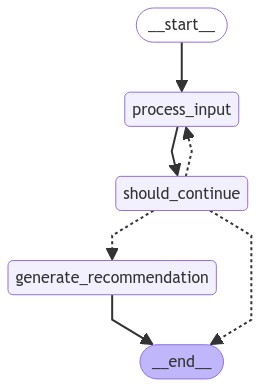

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
#Run the conversation:

initial_state = {
    'summary': "",
    'last_response': "Hello, I'm PsyOzen AI. How can I help you today?",
    'conversation': []
}

def run_conversation(initial_input):
    state = initial_state.copy()
    state, response = process_input(state, initial_input)
    print("AI:", response)

    while should_continue(state):
        user_input = input("User: ")
        state, response = process_input(state, user_input)
        print("AI:", response)

    recommendation = generate_recommendation(state)
    print("Recommendation:", recommendation)

# Start the conversation
#run_conversation("I've been feeling really sad lately.")
run_conversation("")

##Run the conversation(With logs)
#
#from langchain.callbacks.tracers import ConsoleCallbackHandler
#
#def run_conversation(initial_input):
#    with client.new_run(project_name="Therapy Chatbot") as run:
#        state = initial_state.copy()
#        state, response = process_input(state, initial_input)
#        print("AI:", response)
#        run.log("initial_response", response)
#
#        while should_continue(state):
#            user_input = input("User: ")
#            state, response = process_input(state, user_input)
#            print("AI:", response)
#            run.log("user_input", user_input)
#            run.log("ai_response", response)
#
#        recommendation = generate_recommendation(state)
#        print("Recommendation:", recommendation)
#        run.log("final_recommendation", recommendation)
#
## Start the conversation
#run_conversation("I've been feeling really sad lately.")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


AI: I'm so glad we're starting this conversation! It sounds like we have a bit of a miscommunication, though - you didn't actually share any text with me yet!

No worries at all, my friend. Why don't we start fresh? You can paste the text that needs a summary, and I'll get creative and clever to help distill it down into a helpful summary for you. Or, if you'd like, I can even suggest some options or alternatives if you're not sure what kind of summary would be most useful.

What do you say?


KeyboardInterrupt: Interrupted by user

In [ ]:
#Extra function

#Log evalution

from langchain.smith import RunEvalConfig

# Create a dataset
dataset_name = "therapy_conversations"
client.create_dataset(dataset_name, description="Therapy conversation dataset")

# Add examples to the dataset
examples = [
    {
        "input": "I've been feeling really sad lately.",
        "output": "I'm sorry to hear that you've been feeling sad. Can you tell me more about what's been going on?"
    },
    {
        "input": "I'm having trouble sleeping at night.",
        "output": "Difficulty sleeping can be quite frustrating. How long has this been going on, and have you noticed any patterns or triggers?"
    },
    # Add more examples as needed
]

for example in examples:
    client.create_example(
        inputs={"text": example["input"]},
        outputs={"response": example["output"]},
        dataset_name=dataset_name
    )
4. Create an evaluation function:
python
Copy
def evaluate_response(example, prediction):
    # Implement your evaluation logic here
    # For example, you could use a sentiment analysis model to check if the response is empathetic
    # or use another LLM to rate the response
    # For simplicity, let's just check if the response is not empty
    return {"score": 1 if prediction["response"].strip() else 0}

eval_config = RunEvalConfig(
    evaluators=[evaluate_response],
)
5. Run evaluation on the dataset:
python
Copy
evaluation_results = run_on_dataset(
    client=client,
    dataset_name=dataset_name,
    llm_or_chain_factory=response_chain,
    evaluation=eval_config,
)

print(f"Evaluation results: {evaluation_results}")